In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn import svm
from sklearn.neural_network import MLPClassifier

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk
import xlsxwriter
import openpyxl
import os.path
from os.path import exists


In [2]:
filename = "train_augmented_reduced.csv"
df_data = pd.read_csv("../data/"+filename)
df_data.head()

,Unnamed: 0,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,...,wild boar,window screen,window shade,wing,wire-haired fox terrier,wok,wombat,wood rabbit,wooden spoon,zebra
0,0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,...,1.370405e-07,9.120131e-08,9.620410e-08,9.886659e-09,1.516830e-06,2.543714e-07,6.532888e-09,2.143564e-08,2.199132e-08,1.804311e-08
1,1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,...,7.019173e-06,4.317565e-03,9.602808e-03,1.617884e-04,7.745354e-05,1.854264e-06,3.699807e-06,1.004158e-03,2.429163e-03,1.647422e-03
2,2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,...,1.531006e-08,1.205947e-07,1.660079e-09,1.358542e-09,6.075466e-09,1.431959e-09,4.368674e-08,1.527701e-08,4.852483e-10,8.205064e-10
3,3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,...,8.449782e-08,7.258372e-06,9.183127e-06,5.377976e-07,4.001648e-02,8.849357e-07,1.589311e-06,8.007253e-06,2.567087e-06,1.721762e-06
4,4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,...,1.501322e-07,5.324189e-06,2.671657e-07,1.052590e-07,1.369713e-07,4.257420e-09,1.959747e-06,9.865511e-07,8.348145e-09,7.608180e-07


In [3]:
df_data.describe()

,Unnamed: 0,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,...,wild boar,window screen,window shade,wing,wire-haired fox terrier,wok,wombat,wood rabbit,wooden spoon,zebra
count,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,...,9.912000e+03,9.912000e+03,9.912000e+03,9.912000e+03,9.912000e+03,9.912000e+03,9.912000e+03,9.912000e+03,9.912000e+03,9.912000e+03
mean,4955.500000,0.027643,0.772599,0.903955,0.861582,0.009988,0.067797,0.129338,0.049637,0.166263,...,1.680971e-04,4.945250e-03,4.656006e-04,2.016137e-05,1.774047e-03,1.616689e-04,7.770716e-04,1.156481e-03,2.529388e-05,1.296595e-04
std,2861.492268,0.163957,0.419175,0.294668,0.345356,0.099444,0.251409,0.335591,0.217204,0.372335,...,8.636127e-03,4.107170e-02,1.527296e-02,1.532586e-03,2.705001e-02,9.923687e-03,1.698094e-02,2.511377e-02,2.106480e-03,1.015542e-02
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.755033e-18,8.459065e-15,1.037211e-15,1.508323e-16,7.293359e-17,3.952116e-17,5.802472e-18,1.897433e-17,5.675893e-17,5.794180e-17
25%,2477.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.807449e-09,1.427627e-07,3.469123e-08,9.252948e-09,7.996795e-09,1.100376e-08,2.890013e-09,6.398648e-09,3.301014e-09,1.185911e-08
50%,4955.500000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.563749e-08,4.161048e-06,6.001434e-07,1.060787e-07,1.675995e-07,1.456534e-07,5.285660e-08,1.196074e-07,4.097950e-08,1.303853e-07
75%,7433.250000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.833570e-07,1.732849e-04,1.264561e-05,8.798554e-07,3.743129e-06,1.779992e-06,9.077652e-07,2.467043e-06,3.859263e-07,1.078573e-06
max,9911.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.446638e-01,9.877608e-01,9.941986e-01,1.525382e-01,9.840586e-01,9.622539e-01,9.211943e-01,9.805819e-01,2.096009e-01,9.998871e-01


In [4]:
def scale10(n):
    val = 0
    if n <=10: 
        val = 1
    elif n >10 and n<=20:
        val = 2
    elif n >20 and n <=30:
        val = 3
    elif n>30 and n <=40:
        val = 4
    elif n > 40 and n<=50:
        val = 5
    elif n>50 and n<=60:
        val = 6
    elif n>60 and n<=70:
        val = 7
    elif n>70 and n<=80:
        val = 8
    elif n>80 and n<=90:
        val = 9
    else: 
        val = 10
    return(val)

def scale5(n):
    val = 0
    if n <=20: 
        val = 1
    elif n >20 and n<=40:
        val = 2
    elif n >40 and n <=60:
        val = 3
    elif n>60 and n <=80:
        val = 4
    else: val = 5

    return(val)

def scale4(n):
    val = 0
    if n <=25: 
        val = 1
    elif n >25 and n<=50:
        val = 2
    elif n >50 and n <=75:
        val = 3
    else: 
        val = 4

    return(val)

def scale3(n):
    val = 0
    if n <=34: 
        val = 1
    elif n >34 and n<=68:
        val = 2
    else:
        val = 3

    return(val)

def scale2(n):
    val = 0
    if n <=50: 
        val = 1
    else:
        val = 2

    return(val)

In [5]:
#CREATE COLUMNS WITH DIFFERENT SCALES FOR TESTING MODELS
df_data["Scale10"] = df_data.apply(lambda row: scale10(row.Pawpularity), axis=1)
df_data["Scale5"] = df_data.apply(lambda row: scale5(row.Pawpularity), axis=1)
df_data["Scale4"] = df_data.apply(lambda row: scale4(row.Pawpularity), axis=1)
df_data["Scale3"] = df_data.apply(lambda row: scale3(row.Pawpularity), axis=1)
df_data["Scale2"] = df_data.apply(lambda row: scale2(row.Pawpularity), axis=1)

In [6]:
df_data.head()

,Unnamed: 0,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,...,wok,wombat,wood rabbit,wooden spoon,zebra,Scale10,Scale5,Scale4,Scale3,Scale2
0,0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,...,2.543714e-07,6.532888e-09,2.143564e-08,2.199132e-08,1.804311e-08,7,4,3,2,2
1,1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,...,1.854264e-06,3.699807e-06,1.004158e-03,2.429163e-03,1.647422e-03,5,3,2,2,1
2,2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,...,1.431959e-09,4.368674e-08,1.527701e-08,4.852483e-10,8.205064e-10,3,2,2,1,1
3,3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,...,8.849357e-07,1.589311e-06,8.007253e-06,2.567087e-06,1.721762e-06,2,1,1,1,1
4,4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,...,4.257420e-09,1.959747e-06,9.865511e-07,8.348145e-09,7.608180e-07,8,4,3,3,2


### Splitting Data

In [7]:
columnsL = list(df_data.columns)
columnsL

['Unnamed: 0',
 'Id',
 'Subject Focus',
 'Eyes',
 'Face',
 'Near',
 'Action',
 'Accessory',
 'Group',
 'Collage',
 'Human',
 'Occlusion',
 'Info',
 'Blur',
 'Pawpularity',
 'Afghan hound',
 'African chameleon',
 'African crocodile',
 'African grey',
 'African hunting dog',
 'Airedale',
 'American Staffordshire terrier',
 'American alligator',
 'American black bear',
 'American chameleon',
 'Angora',
 'Appenzeller',
 'Arctic fox',
 'Australian terrier',
 'Bedlington terrier',
 'Bernese mountain dog',
 'Blenheim spaniel',
 'Border collie',
 'Border terrier',
 'Boston bull',
 'Bouvier des Flandres',
 'Brabancon griffon',
 'Brittany spaniel',
 'Cardigan',
 'Chesapeake Bay retriever',
 'Chihuahua',
 'Christmas stocking',
 'Crock Pot',
 'Dandie Dinmont',
 'Doberman',
 'Dungeness crab',
 'Egyptian cat',
 'English foxhound',
 'English setter',
 'English springer',
 'EntleBucher',
 'Eskimo dog',
 'French bulldog',
 'German shepherd',
 'German short-haired pointer',
 'Gordon setter',
 'Granny Sm

In [8]:
cols_to_drop = ['Id','Pawpularity', 'Scale10','Scale5','Scale4','Scale3','Scale2', 'Unnamed: 0']

In [9]:
df_data_X = df_data.drop(labels=cols_to_drop, axis=1)
X_cols = list(df_data_X.columns)

In [10]:
#Get X and Y data - shuffle data.
X = np.array(df_data[X_cols])
Y = df_data['Pawpularity'].values[:]

id_image = df_data['Id'].values[:]

Y10 = df_data['Scale10'].values[:]
Y5 = df_data['Scale5'].values[:]
Y4 = df_data['Scale4'].values[:]
Y3 = df_data['Scale3'].values[:]
Y2 = df_data['Scale2'].values[:]


shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y, id_image = X[shuffle], Y[shuffle], id_image[shuffle]
Y10, Y5, Y4, Y3, Y2 = Y10[shuffle], Y5[shuffle], Y4[shuffle], Y3[shuffle], Y2[shuffle]

In [11]:
# Define sizes for train, development and test data (0.5, 0.2, 0.3)
per_train = 0.5
per_dev = 0.2

num_images = len(Y)
train_size = int(round(num_images * per_train,0))
dev_size = int(round(num_images * per_dev,0))

In [12]:
# Split data based on defined sizes
test_data, test_labels, id_test = X[train_size+dev_size:], Y[train_size+dev_size:], id_image[train_size+dev_size:]
test_y10 = Y10[train_size+dev_size:]
test_y5 = Y5[train_size+dev_size:]
test_y4 = Y4[train_size+dev_size:]
test_y3 = Y3[train_size+dev_size:]
test_y2 = Y2[train_size+dev_size:]

dev_data, dev_labels, id_dev = X[train_size:train_size+dev_size], Y[train_size:train_size+dev_size], id_image[train_size:train_size+dev_size]
dev_y10 = Y10[train_size:train_size+dev_size]
dev_y5 = Y5[train_size:train_size+dev_size]
dev_y4 = Y4[train_size:train_size+dev_size]
dev_y3 = Y3[train_size:train_size+dev_size]
dev_y2 = Y2[train_size:train_size+dev_size]

train_data, train_labels, id_train = X[:train_size], Y[:train_size], id_image[:train_size]
train_y10 =  Y10[:train_size]
train_y5 =  Y5[:train_size]
train_y4 =  Y4[:train_size]
train_y3 =  Y3[:train_size]
train_y2 =  Y2[:train_size]

print(num_images)
print(train_data.shape, train_labels.shape, id_train.shape)
print(dev_data.shape, dev_labels.shape, id_dev.shape)
print(test_data.shape, test_labels.shape, id_test.shape)
print(test_y10.shape, dev_y10.shape, train_y10.shape)
print(test_y5.shape, dev_y5.shape, train_y5.shape)
print(test_y4.shape, dev_y4.shape, train_y4.shape)
print(test_y3.shape, dev_y3.shape, train_y3.shape)
print(test_y2.shape, dev_y2.shape, train_y2.shape)

9912
(4956, 472) (4956,) (4956,)
(1982, 472) (1982,) (1982,)
(2974, 472) (2974,) (2974,)
(2974,) (1982,) (4956,)
(2974,) (1982,) (4956,)
(2974,) (1982,) (4956,)
(2974,) (1982,) (4956,)
(2974,) (1982,) (4956,)


In [13]:
def wrt_excel(file, sheet_name, df):
    if os.path.exists(file):
        with pd.ExcelWriter(file, engine="openpyxl", mode='a') as writer:
            df.to_excel(writer, sheet_name=sheet_name)
    else:
        with pd.ExcelWriter(file, engine="openpyxl") as writer:
            df.to_excel(writer, sheet_name=sheet_name)

### KNN Classifier

In [ ]:
def knn_model(train_data, train_labels, dev_data, dev_labels, algorithm, weigth, klist):
    
    f1_score = []
    
    for k in klist:
        knn_mod = KNeighborsClassifier(n_neighbors=k, algorithm=algorithm, weights=weigth, p=1)
        knn_mod.fit(train_data, train_labels)
        acc = knn_mod.score(dev_data, dev_labels)
        f1_score.append(metrics.f1_score(dev_labels, knn_mod.predict(dev_data), average="weighted"))
    
    return(f1_score)
    
def knn_models(train_data, Y_train, dev_data, Y_dev):
    df_knn = pd.DataFrame()
    klist = [1, 2, 3, 4, 5, 6, 7,8,9, 10, 11, 12, 13, 14, 15]
    algorithm_list = ["auto", "ball_tree", "kd_tree", "brute"]

    weights = ["uniform", "distance"]
    df_knn["K"] = klist

    for algorithm in algorithm_list:
        df_knn[algorithm] = knn_model(train_data, Y_train, dev_data, Y_dev, algorithm, weights[1], klist)
    print(df_knn)
    print("df_knn")
    return(df_knn)

### NB Classifier

In [ ]:
def NB_model(train_data, train_labels, dev_data, dev_labels, alpha_list):
    
    f1_score = []
    for alpha in alpha_list:
        NB_mod = BernoulliNB(alpha=alpha)
        NB_mod.fit(train_data, train_labels)
        acc = NB_mod.score(dev_data, dev_labels)
        f1_score.append(metrics.f1_score(dev_labels, NB_mod.predict(dev_data), average="weighted"))
    return(f1_score)

def NB_models(train_data, Y_train, dev_data, Y_dev):
    alpha_list = [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]

    df_NB = pd.DataFrame()
    df_NB["Alpha"] = alpha_list
    df_NB["F1_score"] = NB_model(train_data, Y_train, dev_data, Y_dev, alpha_list)

    print(df_NB)
    print("df_NB")
    return(df_NB)

### Multinomial NB

In [ ]:
def MNB_model(train_data, train_labels, dev_data, dev_labels, alpha_list):
    
    f1_score = []
    for alpha in alpha_list:
        MNB_mod = MultinomialNB(alpha=alpha)
        MNB_mod.fit(train_data, train_labels)
        f1_score.append(metrics.f1_score(dev_labels, MNB_mod.predict(dev_data), average="weighted"))
    
    return(f1_score)

def MNB_models(train_data, Y_train, dev_data, Y_dev):
    alpha_list = [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]

    df_MNB = pd.DataFrame()
    df_MNB["Alpha"] = alpha_list
    df_MNB["F1_score"] = MNB_model(train_data, Y_train, dev_data, Y_dev, alpha_list)

    print(df_MNB)
    print("df_MNB")
    return(df_MNB)

### Gaussian NB

In [ ]:
def GNB_model(train_data, train_labels, dev_data, dev_labels, smoothing_list):
    
    f1_score = []
    for var_smoothing in smoothing_list:
        GNB_mod = GaussianNB(var_smoothing=var_smoothing)
        GNB_mod.fit(train_data, train_labels)
        f1_score.append(metrics.f1_score(dev_labels, GNB_mod.predict(dev_data), average="weighted"))
    
    return(f1_score)

def GNB_models(train_data, Y_train, dev_data, Y_dev):
    smoothing_list = [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]

    df_GNB = pd.DataFrame()
    df_GNB["Var Smooth"] = smoothing_list
    df_GNB["F1_score"] = GNB_model(train_data, Y_train, dev_data, Y_dev, smoothing_list)

    print(df_GNB)
    print("df_GNB")
    return(df_GNB)

### LogisticRegression
Warning The choice of the algorithm depends on the penalty chosen: Supported penalties by solver:  
- ‘newton-cg’ - [‘l2’, ‘none’]  
- ‘lbfgs’ - [‘l2’, ‘none’]  
- ‘liblinear’ - [‘l1’, ‘l2’]  
- ‘sag’ - [‘l2’, ‘none’]  
- ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

**max_iter was increased to 200, so it would converge**
- max_iter int, default=100
- Maximum number of iterations taken for the solvers to converge.

In [ ]:
def LogR_model(train_data, train_labels, dev_data, dev_labels, penalty, solver, c_list):
    
    
    #c_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5]
    
    f1_score = []
    for c in c_list:
        logR_mod = LogisticRegression(C=c, solver=solver, multi_class="auto", penalty=penalty, max_iter=200)
        logR_mod.fit(train_data, train_labels)
        acc = logR_mod.score(dev_data, dev_labels)
        f1_score.append(metrics.f1_score(dev_labels, logR_mod.predict(dev_data), average="weighted"))
    return(f1_score)

def LogR_models(train_data, Y_train, dev_data, Y_dev):
    df_logR =pd.DataFrame()
    solver_list = ["liblinear", "newton-cg", "sag", "lbfgs"]
    c_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

    df_logR["C"] = c_list
    for solver in solver_list:
        df_logR[solver] = LogR_model(train_data, Y_train, dev_data, Y_dev, "l2", solver, c_list)

    print(df_logR)
    print("df_LogR")
    return(df_logR)

### Tree

In [ ]:
def DT_model(train_data, train_labels, dev_data, dev_labels, criterion, max_depth_list):
    
    
    #c_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5]
    
    f1_score = []
    for max_depth in max_depth_list:
        dt_model = DecisionTreeClassifier(criterion=criterion, min_samples_split=10, max_depth=max_depth)
        dt_model.fit(train_data, train_labels)
        f1_score.append(metrics.f1_score(dev_labels, dt_model.predict(dev_data), average="weighted"))

    return(f1_score)

def DT_models(train_data, Y_train, dev_data, Y_dev):
    df_DT =pd.DataFrame()
    criterion_list = ["entropy", "gini"]
    max_depth_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    df_DT["max_depth"] = max_depth_list

    for criterion in criterion_list:
        df_DT[criterion] = DT_model(train_data, Y_train, dev_data, Y_dev, criterion, max_depth_list)

    print(df_DT)
    print("df_DT")
    return(df_DT)

### Random Forest

In [ ]:
def RF_model(train_data, train_labels, dev_data, dev_labels, criterion, n_estimators_list):
        
    f1_score = []
    for n_estimators in n_estimators_list:
        RF_model = RandomForestClassifier(n_estimators=n_estimators,criterion=criterion, min_samples_split=10)
        RF_model.fit(train_data, train_labels)
        f1_score.append(metrics.f1_score(dev_labels, RF_model.predict(dev_data), average="weighted"))

    return(f1_score)

def RF_models(train_data, Y_train, dev_data, Y_dev):
    df_RF =pd.DataFrame()
    criterion_list = ["entropy", "gini"]
    n_estimators_list = [5, 10, 15, 20, 25, 30]
    df_RF["n_estimators"] = n_estimators_list

    for criterion in criterion_list:
        df_RF[criterion] = RF_model(train_data, Y_train, dev_data, Y_dev, criterion, n_estimators_list)

    print(df_RF)
    print("df_RF")
    return(df_RF)

### AdaBoost

In [ ]:
def AdaB_model(train_data, train_labels, dev_data, dev_labels, algorithm, n_estimators_list):
        
    f1_score = []
    for n_estimators in n_estimators_list:
        AdaB_model = AdaBoostClassifier(n_estimators=n_estimators,algorithm=algorithm, learning_rate=1.2)
        AdaB_model.fit(train_data, train_labels)
        f1_score.append(metrics.f1_score(dev_labels, AdaB_model.predict(dev_data), average="weighted"))

    return(f1_score)

def AdaB_models(train_data, Y_train, dev_data, Y_dev):
    df_AdaB =pd.DataFrame()
    algorithm_list = ["SAMME", "SAMME.R"]
    n_estimators_list = [5, 10, 15, 20, 25, 30]
    df_AdaB["n_estimators"] = n_estimators_list

    for algorithm in algorithm_list:
        df_AdaB[algorithm] = AdaB_model(train_data, Y_train, dev_data, Y_dev, algorithm, n_estimators_list)

    print(df_AdaB)
    print("df_AdaB")
    return(df_AdaB)

### SVM

In [ ]:
def SVM_model(train_data, train_labels, dev_data, dev_labels, kernel, c_list):
        
    f1_score = []
    
    for c in c_list:
        if kernel == "LinearSVC":
            svm_model = svm.LinearSVC(C=c, max_iter=10000)
        elif kernel == "poly":
            svm_model = svm.SVC(kernel=kernel, C=c, degree=2, gamma=1)
        elif kernel == "rbf":
            svm_model = svm.SVC(kernel=kernel, C=c, gamma=0.7)
        else:
            svm_model = svm.SVC(kernel=kernel, C=c,)
        
        svm_model.fit(train_data, train_labels)
        f1_score.append(metrics.f1_score(dev_labels, svm_model.predict(dev_data), average="weighted"))

    return(f1_score)

def SVM_models(train_data, Y_train, dev_data):
    df_SVM =pd.DataFrame()
    kernel_list = ["linear", "rbf", "poly", "LinearSVC"]
    c_list = [0.5, 1, 1.5, 2, 2.5, 3, 4, 5, 10, 20]
    df_SVM["C"] = c_list

    for kernel in kernel_list:
        df_SVM[kernel] = SVM_model(train_data, Y_train, dev_data, Y_dev, kernel, c_list)
    print(df_SVM)
    print("df_SVM")

    return(df_SVM)

### Neural Network

**hidden_layer_sizestuple, length = n_layers - 2, default=(100,)**  
The ith element represents the number of neurons in the ith hidden layer.

**activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’**  
Activation function for the hidden layer.  

- ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x  
- ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).  
- ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).   
- ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)  

**solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’**  
The solver for weight optimization.  

- ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
- ‘sgd’ refers to stochastic gradient descent.
- ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

Note: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.

**alphafloat, default=0.0001**
L2 penalty (regularization term) parameter.

In [ ]:
def NN_model(train_data, train_labels, dev_data, dev_labels, activation, solver_list, alpha_list, layer_list, choice):
        
    f1_score = []
    
    if choice == "A":
        for alpha in alpha_list:
            NN_model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, activation=activation, alpha=alpha)
            NN_model.fit(train_data, train_labels)
            f1_score.append(metrics.f1_score(dev_labels, NN_model.predict(dev_data), average="weighted"))
    elif choice == "L":
        for layer in layer_list:
            NN_model = MLPClassifier(hidden_layer_sizes=layer, max_iter=1000, activation=activation)
            NN_model.fit(train_data, train_labels)
            f1_score.append(metrics.f1_score(dev_labels, NN_model.predict(dev_data), average="weighted"))    
    else:
        for solver in solver_list:
            NN_model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=8000, activation=activation, solver=solver)
            NN_model.fit(train_data, train_labels)
            f1_score.append(metrics.f1_score(dev_labels, NN_model.predict(dev_data), average="weighted"))
                
    return(f1_score)

#Note: Changing Alpha is not creating any variation in the f1_score.  Try first with L and then with S
def NN_models(train_data, Y_train, dev_data, Y_dev, choice):
    
    df_NN =pd.DataFrame()
    activation_list = ["identity", "logistic", "tanh", "relu"]
    layer_list = [(10,10,10), (5,5,5), (3,3,3), (20, 20, 20)]
    solver_list = ["lbfgs", "sgd", "adam"]
    alpha_list = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.5]

    for activation in activation_list:
        df_NN[activation] = NN_model(train_data, Y_train, dev_data, Y_dev, activation, solver_list, alpha_list, layer_list, choice)

    if choice == "A":
        df_NN["Alpha"] = alpha_list
    elif choice == "L":
        df_NN["Layers"] = layer_list
    else:
        df_NN["Solver"] = solver_list
    
    print(df_NN)
    print("df_NN")
    return(df_NN)

In [14]:
def assign_y(scale):
    if scale == 2:
        Y_train = train_y2
        Y_dev = dev_y2
    elif scale == 3:
        Y_train = train_y3
        Y_dev = dev_y3
    elif scale == 4:
        Y_train = train_y4
        Y_dev = dev_y4
    elif scale == 5:
        Y_train = train_y5
        Y_dev = dev_y5
    elif scale == 10:
        Y_train = train_y10
        Y_dev = dev_y10
    elif scale == 100:
        Y_train = train_labels
        Y_dev = dev_labels
    else:
        Y_train = train_labels
        Y_dev = dev_labels
    return(Y_train, Y_dev)        

In [15]:
def print_confusion_matrix(Y_dev, Prediction, title):
    cfm = confusion_matrix(Y_dev,Prediction)
    if np.unique(Y_dev).max() > 5:
        size = 6
    else: 
        size = np.unique(Y_dev).max()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(cfm, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(cfm.shape[0]):
        for j in range(cfm.shape[1]):
            ax.text(x=j, y=i,s=cfm[i, j], va='center', ha='center', size='xx-large')
    ax.set_title(title)

In [ ]:
scale_list = [2, 3, 4, 5, 10, 100]
file_name = "model_summary.xlsx"
for scale in scale_list:
    print(scale)
    Y_train, Y_dev = assign_y(scale)
    df_knn = knn_models(train_data, Y_train, dev_data, Y_dev)
    df_NB = NB_models(train_data, Y_train, dev_data, Y_dev)
    df_MNB = MNB_models(train_data, Y_train, dev_data, Y_dev)
    df_GNB = GNB_models(train_data, Y_train, dev_data, Y_dev)
    df_logR = LogR_models(train_data, Y_train, dev_data, Y_dev)
    df_DT = DT_models(train_data, Y_train, dev_data, Y_dev)
    df_RF = RF_models(train_data, Y_train, dev_data, Y_dev)
    df_AdaB = AdaB_models(train_data, Y_train, dev_data, Y_dev)
    df_SVM = SVM_models(train_data, Y_train, dev_data)
    df_NN1 = NN_models(train_data, Y_train, dev_data, Y_dev, "L")
    df_NN2 = NN_models(train_data, Y_train, dev_data, Y_dev, "S")

    wrt_excel(file_name, "knn-"+str(scale), df_knn)
    wrt_excel(file_name, "NB-"+str(scale), df_NB)    
    wrt_excel(file_name, "MNB-"+str(scale), df_MNB)
    wrt_excel(file_name, "GNB-"+str(scale), df_GNB)
    wrt_excel(file_name, "logR-"+str(scale), df_logR)
    wrt_excel(file_name, "DT-"+str(scale), df_DT)
    wrt_excel(file_name, "RF-"+str(scale), df_RF)
    wrt_excel(file_name, "AdaB-"+str(scale), df_AdaB)
    wrt_excel(file_name, "SVM-"+str(scale), df_SVM)
    wrt_excel(file_name, "NN-"+str(scale)+"L", df_NN1)
    wrt_excel(file_name, "NN-"+str(scale)+"S", df_NN2)

### Exploring Model Model

In [ ]:
scale = 10
Y_train, Y_dev = assign_y(scale)

In [ ]:
df_knn = knn_models(train_data, Y_train, dev_data, Y_dev)

#### Further Exploring KDD

### KNN a single model: Options
**n_neighbors:**  integer, default=5

**weights: {‘uniform’, ‘distance’} or callable, default=’uniform’. Weight function used in prediction. Possible values**:    
(a) ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.  
(b) ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.  
(b) [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.  

**algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’**
Algorithm used to compute the nearest neighbors:
(a) ‘ball_tree’ will use BallTree  
(b) ‘kd_tree’ will use KDTree  
(c) ‘brute’ will use a brute-force search.  
(d) ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.  

**metric - str or callable, default=’minkowski’**  
“euclidean”, “manhattan”, “chebyshev”, “minkowski”, “wminkowski”, “seuclidean”, “mahalanobis”



For K:  9 ,for scale  10 , f1_score:  0.20369004599023197


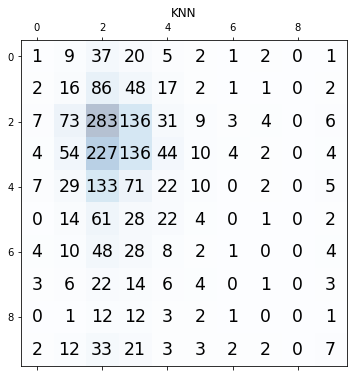

In [30]:
scale = 10
Y_train, Y_dev = assign_y(scale)
k = 9

metric_list = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis']
metric = metric_list[1]

weights = ["uniform", "distance"]
algorithm_list = ["auto", "ball_tree", "kd_tree", "brute"]

knn_mod = KNeighborsClassifier(n_neighbors=k, algorithm=algorithm_list[0], weights=weights[0],  metric = metric)
knn_mod.fit(train_data, Y_train)
pred_knn = knn_mod.predict(dev_data)
f1_score = metrics.f1_score(Y_dev, knn_mod.predict(dev_data), average="weighted")
print("For K: ",k,",for scale ",scale,", f1_score: ",f1_score)

#Generate and create dataframe of Confusion Matrix
print_confusion_matrix(Y_dev, pred_knn, "KNN")


### Naive Bayes

For alpha:  0.01 ,for scale  10 , f1_score:  0.1782627716170566
For alpha:  0.01 ,for scale  10 , f1_score:  0.19889422709580085
For alpha:  0.01 ,for scale  10 , f1_score:  0.08451262997683431


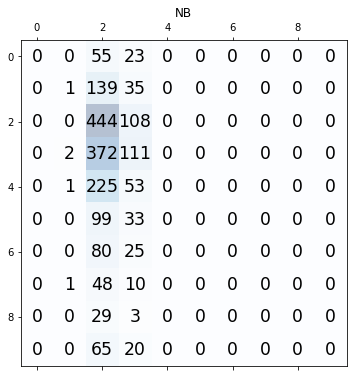

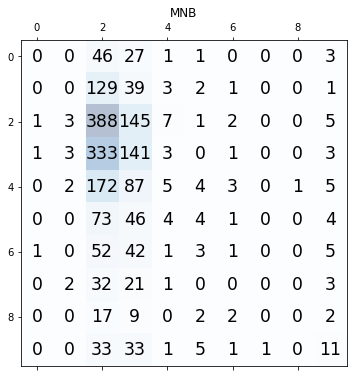

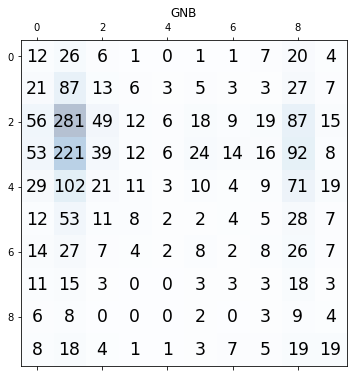

In [35]:
scale = 10

Y_train, Y_dev = assign_y(scale)

alpha_list = [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
smoothing_list = [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
i = 3

NB_mod = BernoulliNB(alpha=alpha_list[i])
NB_mod.fit(train_data, Y_train)
pred_NB = NB_mod.predict(dev_data)
f1_score = metrics.f1_score(Y_dev, NB_mod.predict(dev_data), average="weighted")
print("For alpha: ",alpha_list[i],",for scale ",scale,", f1_score: ",f1_score)
print_confusion_matrix(Y_dev, pred_NB, "NB")

MNB_mod = MultinomialNB(alpha=alpha_list[i])
MNB_mod.fit(train_data, Y_train)
pred_MNB = MNB_mod.predict(dev_data)
f1_score = metrics.f1_score(Y_dev, MNB_mod.predict(dev_data), average="weighted")
print("For alpha: ",alpha_list[i],",for scale ",scale,", f1_score: ",f1_score)
print_confusion_matrix(Y_dev, pred_MNB, "MNB")

GNB_mod = GaussianNB(var_smoothing=smoothing_list[i])
GNB_mod.fit(train_data, Y_train)
pred_GNB = GNB_mod.predict(dev_data)
f1_score = metrics.f1_score(Y_dev, GNB_mod.predict(dev_data), average="weighted")
print("For alpha: ",alpha_list[i],",for scale ",scale,", f1_score: ",f1_score)
print_confusion_matrix(Y_dev, pred_GNB, "GNB")

### Logistic Regression

**multi_class{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’**  
If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.

F1_score:  0.21717970100742184


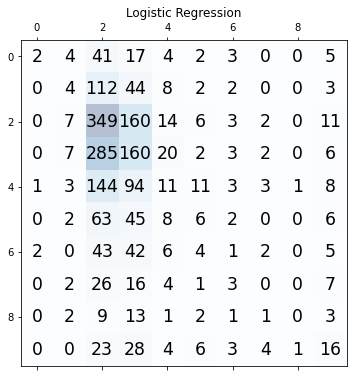

In [44]:
scale = 10
Y_train, Y_dev = assign_y(scale)
c_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 100]
solver_list = ["liblinear", "newton-cg", "sag", "lbfgs"]
c_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
penalty = ["l1", "l2"]

logR_mod = LogisticRegression(C=c_list[8], solver=solver_list[2], multi_class='multinomial', penalty=penalty[1], max_iter=200)
logR_mod.fit(train_data, Y_train)
pred_logR = logR_mod.predict(dev_data)
f1_score = metrics.f1_score(Y_dev, logR_mod.predict(dev_data), average="weighted")
print("F1_score: ", f1_score)
print_confusion_matrix(Y_dev, pred_logR, "Logistic Regression")


### Desicion Tress - Random Forest

F1_score:  0.20542761982611238
F1_score:  0.21678623330678393
F1_score:  0.18296979657549253


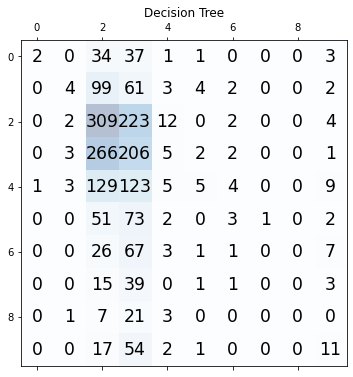

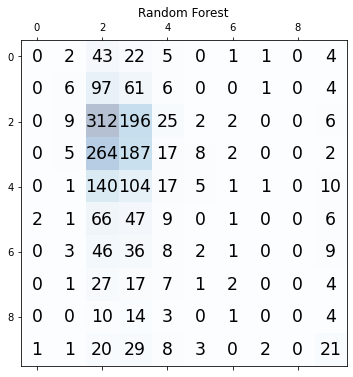

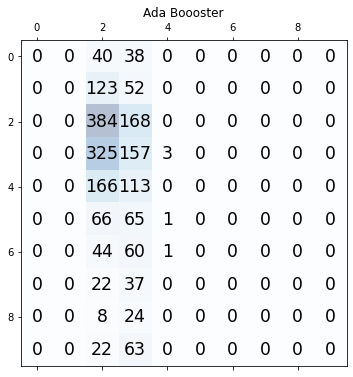

In [49]:
scale = 10
Y_train, Y_dev = assign_y(scale)
criterion_list = ["entropy", "gini"]
max_depth_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
n_estimators_list = [5, 10, 15, 20, 25, 30]
algorithm_list = ["SAMME", "SAMME.R"]


dt_model = DecisionTreeClassifier(criterion=criterion_list[0], min_samples_split=10, max_depth=max_depth_list[5])
dt_model.fit(train_data, Y_train)
pred_dt = dt_model.predict(dev_data)
f1_score = metrics.f1_score(Y_dev, dt_model.predict(dev_data), average="weighted")
print("F1_score: ", f1_score)
print_confusion_matrix(Y_dev, pred_dt, "Decision Tree")

RF_model = RandomForestClassifier(n_estimators=n_estimators_list[3],criterion=criterion_list[0], min_samples_split=10)
RF_model.fit(train_data, Y_train)
pred_RF = RF_model.predict(dev_data)
f1_score = metrics.f1_score(Y_dev, RF_model.predict(dev_data), average="weighted")
print("F1_score: ", f1_score)
print_confusion_matrix(Y_dev, pred_RF, "Random Forest")

AdaB_model = AdaBoostClassifier(n_estimators=n_estimators_list[3],algorithm=algorithm_list[0], learning_rate=1.2)
AdaB_model.fit(train_data, Y_train)
pred_AdaB = AdaB_model.predict(dev_data)
f1_score = metrics.f1_score(Y_dev, AdaB_model.predict(dev_data), average="weighted")
print("F1_score: ", f1_score)
print_confusion_matrix(Y_dev, pred_AdaB, "Ada Boooster")

### SVM

In [55]:
train_data.shape

(4956, 472)

F1_score:  0.21695743276149096
F1_score:  0.2106748389607841
F1_score:  0.21637658508249327
F1_score:  0.2017562101613773


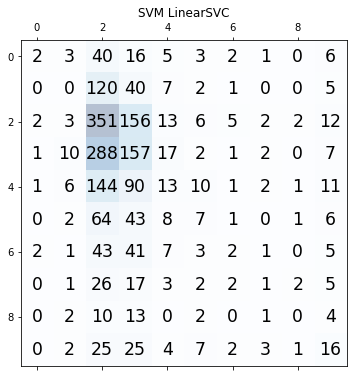

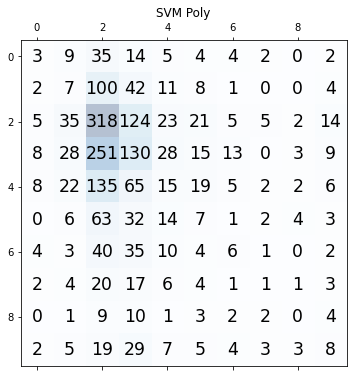

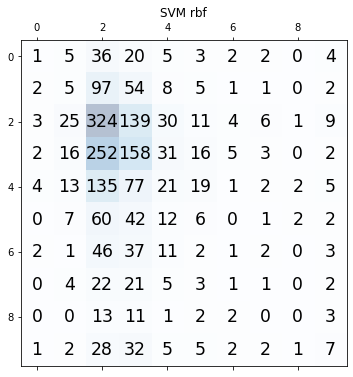

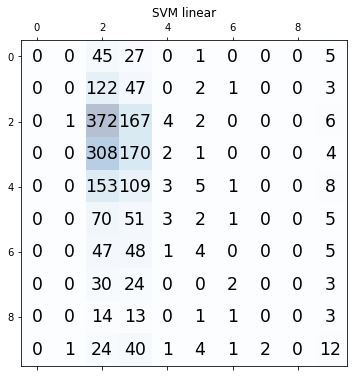

In [56]:
scale = 10
Y_train, Y_dev = assign_y(scale)
kernel_list = ["linear", "rbf", "poly", "LinearSVC"]
c_list = [0.5, 1, 1.5, 2, 2.5, 3, 4, 5, 10, 20]

svm_LSVC = svm.LinearSVC(C=c_list[5], max_iter=10000)
svm_LSVC.fit(train_data, Y_train)
pred_LSVC = svm_LSVC.predict(dev_data)
f1_score = metrics.f1_score(Y_dev, svm_LSVC.predict(dev_data), average="weighted")
print("F1_score: ", f1_score)
print_confusion_matrix(Y_dev, pred_LSVC, "SVM LinearSVC")

svm_poly = svm.SVC(kernel="poly", C=c_list[5], degree=2, gamma=1)
svm_poly.fit(train_data, Y_train)
pred_poly = svm_poly.predict(dev_data)
f1_score = metrics.f1_score(Y_dev, svm_poly.predict(dev_data), average="weighted")
print("F1_score: ", f1_score)
print_confusion_matrix(Y_dev, pred_poly, "SVM Poly")

svm_rbf = svm.SVC(kernel="rbf", C=c_list[5], gamma=0.7)
svm_rbf.fit(train_data, Y_train)
pred_rbf = svm_rbf.predict(dev_data)
f1_score = metrics.f1_score(Y_dev, svm_rbf.predict(dev_data), average="weighted")
print("F1_score: ", f1_score)
print_confusion_matrix(Y_dev, pred_rbf, "SVM rbf")

svm_lin = svm.SVC(kernel="linear", C=c_list[5])
svm_lin.fit(train_data, Y_train)
pred_lin = svm_lin.predict(dev_data)
f1_score = metrics.f1_score(Y_dev, svm_lin.predict(dev_data), average="weighted")
print("F1_score: ", f1_score)
print_confusion_matrix(Y_dev, pred_lin, "SVM linear")



In [ ]:
#SIMPLE SVM


#### Neural Networks

In [ ]:
def NN_model1(train_data, train_labels, dev_data, dev_labels, activation, solver_list, alpha_list, layer_list, choice):
        
    f1_score = []
    
    if choice == "A":
        for alpha in alpha_list:
            NN_model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, activation=activation, alpha=alpha)
            NN_model.fit(train_data, train_labels)
            f1_score.append(metrics.f1_score(dev_labels, NN_model.predict(dev_data), average="weighted"))
    elif choice == "L":
        for layer in layer_list:
            NN_model = MLPClassifier(hidden_layer_sizes=layer, max_iter=1000, activation=activation)
            NN_model.fit(train_data, train_labels)
            f1_score.append(metrics.f1_score(dev_labels, NN_model.predict(dev_data), average="weighted"))    
    else:
        for solver in solver_list:
            NN_model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=8000, activation=activation, solver=solver)
            NN_model.fit(train_data, train_labels)
            f1_score.append(metrics.f1_score(dev_labels, NN_model.predict(dev_data), average="weighted"))
                
    return(f1_score)

#Note: Changing Alpha is not creating any variation in the f1_score.  Try first with L and then with S
def NN_models1(train_data, Y_train, dev_data, Y_dev, choice):
    
    df_NN =pd.DataFrame()
    #activation_list = ["identity", "logistic", "tanh", "relu"]
    #layer_list = [(10,10,10), (5,5,5), (3,3,3), (20, 20, 20)]
    #solver_list = ["lbfgs", "sgd", "adam"]
    #alpha_list = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.5]

    activation_list = ["identity"]
    layer_list = [(10,10,10)]
    solver_list = ["lbfgs"]
    alpha_list = [0.0001]

    for activation in activation_list:
        df_NN[activation] = NN_model1(train_data, Y_train, dev_data, Y_dev, activation, solver_list, alpha_list, layer_list, choice)

    if choice == "A":
        df_NN["Alpha"] = alpha_list
    elif choice == "L":
        df_NN["Layers"] = layer_list
    else:
        df_NN["Solver"] = solver_list
    
    print(df_NN)
    print("df_NN")
    return(df_NN)

scale = 5
Y_train, Y_dev = assign_y(scale)

df_NN1 = NN_models1(train_data, Y_train, dev_data, Y_dev, "L")
df_NN1

In [67]:
#SIMPLE NEURAL NETWORK
scale = 2
layer_list = [(10,10,10), (5,5,5), (3,3,3), (20, 20, 20), (100,100,100)]
activation_list = ["identity", "logistic", "tanh", "relu"]
Y_train, Y_dev = assign_y(scale)

NN_model = MLPClassifier(hidden_layer_sizes=layer_list[4], max_iter=1000, activation=activation_list[3])
NN_model.fit(train_data, Y_train)
f1_score = metrics.f1_score(Y_dev, NN_model.predict(dev_data), average="weighted")
print(f1_score)

0.7224232639086609


### Keras - Tensorflow

- For X values: using StandardScaler ->  X_scaler = StandardScaler().fit(traind_data):  
> train_data -> X_train_scaled  
> dev_data => X_test_scaled  

- For Y values: usig label_encoder.transform(Y_train):
> Y_train -> encoded_y_train  
> Y_dev -> encoded_y_dev  

- Then convert to one-hot-encoding:
> y_train_categorical = to_catergorical(encoded_y_train)  
> y_test_categorical = to_categorical(encoded_y_dev)  


In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

#For saving and loading created models and labelencoders
import joblib
from joblib import dump, load

#For CREATING NEURAL NETWORK MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [47]:
scale = 5
Y_train, Y_dev = assign_y(scale)

In [48]:
# Step 0: SCALE THE DATA - TO BRING THEM TO THE SAME SCALE (MAY NOT BE NEEDED HERE AS IT IS ZEROS AND ONES)
X_scaler = StandardScaler().fit(train_data)
X_train_scaled = X_scaler.transform(train_data)
X_test_scaled = X_scaler.transform(dev_data)

In [72]:
#print(X_test_scaled)

In [50]:
# Step 1: Label-encode data set (NOT NEEDED AS Y IS ALREADY CODED AS NUMERIC)
label_encoder = LabelEncoder()
label_encoder.fit(Y_train)

encoded_y_train = label_encoder.transform(Y_train)
encoded_y_dev = label_encoder.transform(Y_dev)

In [51]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(Y_train)
y_test_categorical = to_categorical(Y_dev)

In [52]:
#Saving the label_encoder - When using encoded, it could be saved for being uploaded later for use with model
#from sklearn.externals.joblib import dump, load  - THIS DID NOT WORK - USED THE CODE BELOW

dump(label_encoder, 'Project_1_NN_label_encoder.bin', compress=True)

['Project_1_NN_label_encoder.bin']

In [55]:
#Scale = numer of output units (depending on scale being used)
#input_dim = number of features being used for the model

input_dim = len(X_test_scaled[0])
print(input_dim)
print(X_train_scaled.shape)
print(scale)

# Create model and add layers
model = Sequential()
model.add(Dense(units=3000, activation='relu', input_dim=input_dim))
model.add(Dense(units=3000, activation='relu'))
model.add(Dense(units=scale+1, activation='softmax'))

In [56]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

Train on 4956 samples
Epoch 1/60
4956/4956 - 9s - loss: 1.5411 - accuracy: 0.4816
Epoch 2/60
4956/4956 - 9s - loss: 1.2309 - accuracy: 0.5184
Epoch 3/60
4956/4956 - 8s - loss: 1.1735 - accuracy: 0.5329
Epoch 4/60
4956/4956 - 8s - loss: 1.1292 - accuracy: 0.5450
Epoch 5/60
4956/4956 - 8s - loss: 1.0977 - accuracy: 0.5543
Epoch 6/60
4956/4956 - 8s - loss: 1.0530 - accuracy: 0.5676
Epoch 7/60
4956/4956 - 8s - loss: 1.0256 - accuracy: 0.5793
Epoch 8/60
4956/4956 - 8s - loss: 0.9982 - accuracy: 0.5981
Epoch 9/60
4956/4956 - 8s - loss: 0.9485 - accuracy: 0.6073
Epoch 10/60
4956/4956 - 8s - loss: 0.8944 - accuracy: 0.6368
Epoch 11/60
4956/4956 - 8s - loss: 0.8721 - accuracy: 0.6481
Epoch 12/60
4956/4956 - 8s - loss: 0.8665 - accuracy: 0.6517
Epoch 13/60
4956/4956 - 8s - loss: 0.8061 - accuracy: 0.6770
Epoch 14/60
4956/4956 - 8s - loss: 0.8099 - accuracy: 0.6828
Epoch 15/60
4956/4956 - 8s - loss: 0.7694 - accuracy: 0.6979
Epoch 16/60
4956/4956 - 8s - loss: 0.7170 - accuracy: 0.7123
Epoch 17/60

In [57]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 0s - loss: 21.4978 - accuracy: 0.4334
Normal Neural Network - Loss: 21.497823193383624, Accuracy: 0.43340060114860535


In [58]:
# Save the model
model.save("FP_NN_FDF1_scale_5.h5")

In [78]:
encoded_predictions = model.predict_classes(X_test_scaled)
print(encoded_predictions)

[5 1 3 ... 2 2 2]


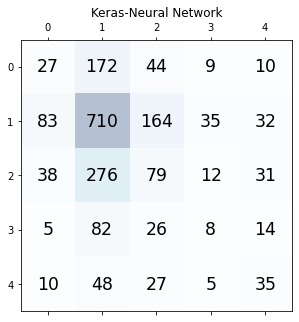

In [79]:
print_confusion_matrix(Y_dev, encoded_predictions, "Keras-Neural Network")

### Other Neural Network - Keras

In [59]:
# 1D Convolutional Neural Networks in Keras for Time Sequences

from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import Dropout
import tensorflow.keras

TIME_PERIODS = 1
num_sensors = input_dim
input_shape = input_dim
num_classes = scale+1

In [60]:
model_m = Sequential()
model_m.add(Reshape((TIME_PERIODS, num_sensors), input_shape=(input_shape,)))
model_m.add(Conv1D(1000, 1, activation='relu', input_shape=(TIME_PERIODS, num_sensors)))
model_m.add(Conv1D(1000, 1, activation='relu'))
model_m.add(MaxPooling1D(1))
model_m.add(Conv1D(1600, 1, activation='relu'))
model_m.add(Conv1D(1600, 1, activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.5))
model_m.add(Dense(num_classes, activation='softmax'))
print(model_m.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 1, 472)            0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 1, 1000)           473000    
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 1, 1000)           1001000   
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 1, 1000)           0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 1, 1600)           1601600   
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 1, 1600)           2561600   
_________________________________________________________________
global_average_pooling1d_4 ( (None, 1600)             

In [61]:
callbacks_list = [keras.callbacks.ModelCheckpoint(filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
                                                  monitor='val_loss', save_best_only=True),
                  keras.callbacks.EarlyStopping(monitor='acc', patience=1)]

model_m.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

BATCH_SIZE = 400
EPOCHS = 50

history = model_m.fit(X_train_scaled,
                      y_train_categorical,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

Train on 3964 samples, validate on 992 samples
Epoch 1/50
3964/3964 [==============================] - 23s 6ms/sample - loss: 1.8184 - accuracy: 0.4026 - val_loss: 1.4663 - val_accuracy: 0.5050
Epoch 2/50
3964/3964 [==============================] - 22s 5ms/sample - loss: 1.3635 - accuracy: 0.5126 - val_loss: 1.3215 - val_accuracy: 0.5050
Epoch 3/50
3964/3964 [==============================] - 22s 6ms/sample - loss: 1.2603 - accuracy: 0.5172 - val_loss: 1.3124 - val_accuracy: 0.5020
Epoch 4/50
3964/3964 [==============================] - 22s 6ms/sample - loss: 1.1872 - accuracy: 0.5368 - val_loss: 1.4086 - val_accuracy: 0.4869
Epoch 5/50
3964/3964 [==============================] - 22s 5ms/sample - loss: 1.1124 - accuracy: 0.5610 - val_loss: 1.4543 - val_accuracy: 0.4748
Epoch 6/50
3964/3964 [==============================] - 22s 5ms/sample - loss: 1.0497 - accuracy: 0.5891 - val_loss: 1.6398 - val_accuracy: 0.4718
Epoch 7/50
3964/3964 [==============================] - 23s 6ms/sample 

3964/3964 [==============================] - 25s 6ms/sample - loss: 0.5024 - accuracy: 0.8052 - val_loss: 4.0119 - val_accuracy: 0.4103
Epoch 23/50
3964/3964 [==============================] - 21s 5ms/sample - loss: 0.4867 - accuracy: 0.8163 - val_loss: 4.1813 - val_accuracy: 0.4204
Epoch 24/50
3964/3964 [==============================] - 21s 5ms/sample - loss: 0.4795 - accuracy: 0.8206 - val_loss: 4.2569 - val_accuracy: 0.3972
Epoch 25/50
3964/3964 [==============================] - 21s 5ms/sample - loss: 0.4820 - accuracy: 0.8176 - val_loss: 4.4109 - val_accuracy: 0.4012
Epoch 26/50
3964/3964 [==============================] - 21s 5ms/sample - loss: 0.5197 - accuracy: 0.8065 - val_loss: 4.0199 - val_accuracy: 0.4224
Epoch 27/50
3964/3964 [==============================] - 84s 21ms/sample - loss: 0.4778 - accuracy: 0.8161 - val_loss: 4.4769 - val_accuracy: 0.3810
Epoch 28/50
3964/3964 [==============================] - 86s 22ms/sample - loss: 0.4588 - accuracy: 0.8277 - val_loss: 4.77

3964/3964 [==============================] - 22s 6ms/sample - loss: 0.3510 - accuracy: 0.8557 - val_loss: 5.4229 - val_accuracy: 0.3921
Epoch 45/50
3964/3964 [==============================] - 22s 6ms/sample - loss: 0.3634 - accuracy: 0.8532 - val_loss: 5.1920 - val_accuracy: 0.4123
Epoch 46/50
3964/3964 [==============================] - 22s 5ms/sample - loss: 0.3563 - accuracy: 0.8585 - val_loss: 5.4739 - val_accuracy: 0.4204
Epoch 47/50
3964/3964 [==============================] - 22s 5ms/sample - loss: 0.3520 - accuracy: 0.8547 - val_loss: 5.4578 - val_accuracy: 0.4113
Epoch 48/50
3964/3964 [==============================] - 22s 6ms/sample - loss: 0.3484 - accuracy: 0.8537 - val_loss: 5.1920 - val_accuracy: 0.4153
Epoch 49/50
3964/3964 [==============================] - 22s 5ms/sample - loss: 0.3404 - accuracy: 0.8658 - val_loss: 5.7515 - val_accuracy: 0.4012
Epoch 50/50
3964/3964 [==============================] - 22s 5ms/sample - loss: 0.3359 - accuracy: 0.8620 - val_loss: 5.6816

In [62]:
model_loss, model_accuracy = model_m.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 0s - loss: 25.7289 - accuracy: 0.4157
Normal Neural Network - Loss: 25.728914523100638, Accuracy: 0.4157416820526123


In [63]:
# Save the model
model_m.save("FP_1DCNN_FDF_scale_5.h5")

### 1D CNN: Research and Implement

### Trying Transformations and/or Combinations

In [38]:
#Get X and Y data - shuffle data.
X_cols = ['Subject Focus','Eyes', 'Face','Near','Action','Accessory','Group','Collage','Human','Occlusion','Info','Blur']
X = np.array(df_data[X_cols])


In [ ]:
adj = [0.008395894, 0.234656044, 0.274551861, 0.261682243,0.003033553,0.02059139,0.039282978,0.015075839,
     0.050497932,0.052244523,0.018599663,0.02138808]
adj2 = [0,0.25055621,0.293155346,0.279413689,0.003239105,0.021986651,0.041944772,0,0.053919644,0.055784583,0,0]
len(adj2)
adj3 = [0,0.240296213,0.281150962,0.26797201,0.003106467,0.021086322,0.04022718,0,
        0.051711695,0.053500267,0.019046723,0.021902162]
len(adj3)

In [ ]:
X = X * adj

In [ ]:
X

In [ ]:
np.random.seed(0)

Y = df_data['Pawpularity'].values[:]

id_image = df_data['Id'].values[:]

Y10 = df_data['Scale10'].values[:]
Y5 = df_data['Scale5'].values[:]
Y4 = df_data['Scale4'].values[:]
Y3 = df_data['Scale3'].values[:]
Y2 = df_data['Scale2'].values[:]


shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y, id_image = X[shuffle], Y[shuffle], id_image[shuffle]
Y10, Y5, Y4, Y3, Y2 = Y10[shuffle], Y5[shuffle], Y4[shuffle], Y3[shuffle], Y2[shuffle]

In [ ]:
# Define sizes for train, development and test data (0.5, 0.2, 0.3)
per_train = 0.5
per_dev = 0.2

num_images = len(Y)
train_size = int(round(num_images * per_train,0))
dev_size = int(round(num_images * per_dev,0))

In [ ]:
# Split data based on defined sizes
test_data, test_labels, id_test = X[train_size+dev_size:], Y[train_size+dev_size:], id_image[train_size+dev_size:]
test_y10 = Y10[train_size+dev_size:]
test_y5 = Y5[train_size+dev_size:]
test_y4 = Y4[train_size+dev_size:]
test_y3 = Y3[train_size+dev_size:]
test_y2 = Y2[train_size+dev_size:]

dev_data, dev_labels, id_dev = X[train_size:train_size+dev_size], Y[train_size:train_size+dev_size], id_image[train_size:train_size+dev_size]
dev_y10 = Y10[train_size:train_size+dev_size]
dev_y5 = Y5[train_size:train_size+dev_size]
dev_y4 = Y4[train_size:train_size+dev_size]
dev_y3 = Y3[train_size:train_size+dev_size]
dev_y2 = Y2[train_size:train_size+dev_size]

train_data, train_labels, id_train = X[:train_size], Y[:train_size], id_image[:train_size]
train_y10 =  Y10[:train_size]
train_y5 =  Y5[:train_size]
train_y4 =  Y4[:train_size]
train_y3 =  Y3[:train_size]
train_y2 =  Y2[:train_size]

print(num_images)
print(train_data.shape, train_labels.shape, id_train.shape)
print(dev_data.shape, dev_labels.shape, id_dev.shape)
print(test_data.shape, test_labels.shape, id_test.shape)
print(test_y10.shape, dev_y10.shape, train_y10.shape)
print(test_y5.shape, dev_y5.shape, train_y5.shape)
print(test_y4.shape, dev_y4.shape, train_y4.shape)
print(test_y3.shape, dev_y3.shape, train_y3.shape)
print(test_y2.shape, dev_y2.shape, train_y2.shape)

In [ ]:
scale = 2
Y_train, Y_dev = assign_y(scale)
k = 9
weights = ["uniform", "distance"]
knn_mod = KNeighborsClassifier(n_neighbors=k, algorithm="ball_tree", weights=weights[1])
knn_mod.fit(train_data, Y_train)
pred_knn = knn_mod.predict(dev_data)
f1_score = metrics.f1_score(Y_dev, knn_mod.predict(dev_data), average="weighted")
print("For K: ",k,",for scale ",scale,", f1_score: ",f1_score)

#Generate and create dataframe of Confusion Matrix
cfm = confusion_matrix(Y_dev,pred_knn)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cfm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cfm.shape[0]):
    for j in range(cfm.shape[1]):
        ax.text(x=j, y=i,s=cfm[i, j], va='center', ha='center', size='xx-large')

In [ ]:
knn_mod = KNeighborsClassifier(n_neighbors=k, algorithm=algorithm, weights=weigth)
NB_mod = BernoulliNB(alpha=alpha)
MNB_mod = MultinomialNB(alpha=alpha)
GNB_mod = GaussianNB(var_smoothing=var_smoothing)
logR_mod = LogisticRegression(C=c, solver=solver, multi_class="auto", penalty=penalty, max_iter=200)
dt_model = DecisionTreeClassifier(criterion=criterion, min_samples_split=10, max_depth=max_depth)
RF_model = RandomForestClassifier(n_estimators=n_estimators,criterion=criterion, min_samples_split=10)
AdaB_model = AdaBoostClassifier(n_estimators=n_estimators,algorithm=algorithm, learning_rate=1.2)